# Fixed point reprogramming with ActoNet

This notebook demonstrate usage of ActoNet to identify permanent control of Boolean network enforcing a given property
We end with a validation using CABEAN

In [1]:
import actonet
import biolqm

In [2]:
lqm = biolqm.load("http://ginsim.org/sites/default/files/Bladder_Model.zginml")

Downloading http://ginsim.org/sites/default/files/Bladder_Model.zginml

In [3]:
inputs = {
    "GrowthInhibitors":1,
    "EGFR_stimulus":1,
    "FGFR3_stimulus":1
}
target = {"Apoptosis_b1": 1, "RB1": 1}

In [4]:
an = actonet.ActoNet(lqm, inputs)

In [5]:
s = an.reprogramming_fixpoints(target, maxsize=2)
s

[FromCondition('input', PermanentPerturbation(ATM_b1=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(DNAdamage=1, p16INK4a=0)),
 FromCondition('input', PermanentPerturbation(RB1=1, TP53=1)),
 FromCondition('input', PermanentPerturbation(Apoptosis_b1=1, RB1=1)),
 FromCondition('input', PermanentPerturbation(ATM_b1=1, RB1=1)),
 FromCondition('input', PermanentPerturbation(DNAdamage=1, RB1=1))]

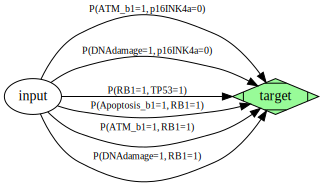

In [6]:
s.as_graph()

In [7]:
s.aliases

,EGFR_stimulus,FGFR3_stimulus,GrowthInhibitors
input,1,1,1


In [8]:
s.as_table()

,ATM_b1,Apoptosis_b1,DNAdamage,RB1,TP53,p16INK4a
0,,,,1,1,
1,,,1,,,0
2,,,1,1,,
3,,1,,1,,
4,1,,,,,0
5,1,,,1,,


In [9]:
from colomoto.minibn import BooleanNetwork
from colomoto_jupyter import tabulate
import cabean # for attractor computation

In [10]:
test = biolqm.to_minibn(lqm, ensure_boolean=True)
for n, v in inputs.items():
    test[n] = v
test["RB1"] = 1
test["TP53"] = 1

In [11]:
import cabean

In [12]:
tabulate(cabean.attractors(test))

,AKT,ATM_b1,ATM_b2,Apoptosis_b1,Apoptosis_b2,CDC25A,CHEK1_2_b1,CHEK1_2_b2,CyclinA,CyclinD1,CyclinE1,DNAdamage,E2F1_b1,E2F1_b2,E2F3_b1,E2F3_b2,EGFR,EGFR_stimulus,FGFR3,FGFR3_stimulus,GRB2,GrowthInhibitors,Growth_Arrest,MDM2,PI3K,PTEN,Proliferation,RAS,RB1,RBL2,SPRY,TP53,p14ARF,p16INK4a,p21CIP
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1
1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1
